https://note.com/scilabcafe/n/nae43bd4e8946

In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=f53c6e31a223889af7d0c0b8064f0b64792192e746ebee6807d3987c80b3084a
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [3]:
import pandas_datareader.data as web
import yfinance as yf

import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
import japanize_matplotlib
%matplotlib inline

import plotly.graph_objects as go # グラフ表示関連ライブラリ
import plotly.io as pio # 入出力関連ライブラリ
# pio.renderers.default = 'iframe'
from plotly import offline

from plotly.subplots import make_subplots  # subplot

'^SPX'：S&P500の株価指数  
'HYG'：ジャンク債  
'^RUT'：Russell 2000 Index（ラッセル2000指数）アメリカの中小型企業の株式のパフォーマンスを追跡する指数  
'^SKEW'：CBOE SKEW Index（CBOEスキュー指数）市場参加者の長期的なリスクに関する見通しを提供する指数。高いスキュー値は、市場の大きな下落のリスクが増加していることを示唆  
'^VIX'：CBOE Volatility Index（CBOEボラティリティ指数）オプション市場のボラティリティを測定する指数であり、市場の恐怖心や不安のレベルを示す

In [4]:
# stooqより取得
codelists_stooq = [
    "^SPX", # SP 500
]

# yahoofinanceより取得
codelists_yf = [
    'HYG', # ハイ・イールド債
    '^RUT', # Russel 2000
    "^SKEW", # SKEW
    "^VIX", # VIX index
]

# 2020/1/1から現在まで
start = '2019-01-01'
end = datetime.date.today()

In [10]:
# データ取得(stooq)
_df_stooq = web.DataReader(codelists_stooq, 'stooq', start, end)['Close']

# 日付を昇順に並び替える
_df_stooq = _df_stooq.sort_index()

# データ取得(yahoo finance)
_df_yahoo = yf.download(codelists_yf, start, end)['Close']

df = pd.DataFrame()

df = pd.concat(_df_stooq, _df_yahoo, on= 'Date', how= "inner")
df.columns = ['SP500', 'HYG', 'Russel2000', 'SKEW', 'VIX']
display(df)

[*********************100%***********************]  4 of 4 completed


TypeError: concat() got an unexpected keyword argument 'on'

In [ ]:
# df にNoneがないか、df.isnull().sum()で確認
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1368 entries, 2019-01-02 to 2024-06-07
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SP500       1368 non-null   float64
 1   HYG         1368 non-null   float64
 2   Russel2000  1368 non-null   float64
 3   SKEW        1292 non-null   float64
 4   VIX         1368 non-null   float64
dtypes: float64(5)
memory usage: 64.1 KB


None

SP500          0
HYG            0
Russel2000     0
SKEW          76
VIX            0
dtype: int64

In [ ]:
# NaNをNanの前の値で補完
df['SKEW'].ffill(inplace= True)
display(df.isnull().sum())

SP500         0
HYG           0
Russel2000    0
SKEW          0
VIX           0
dtype: int64

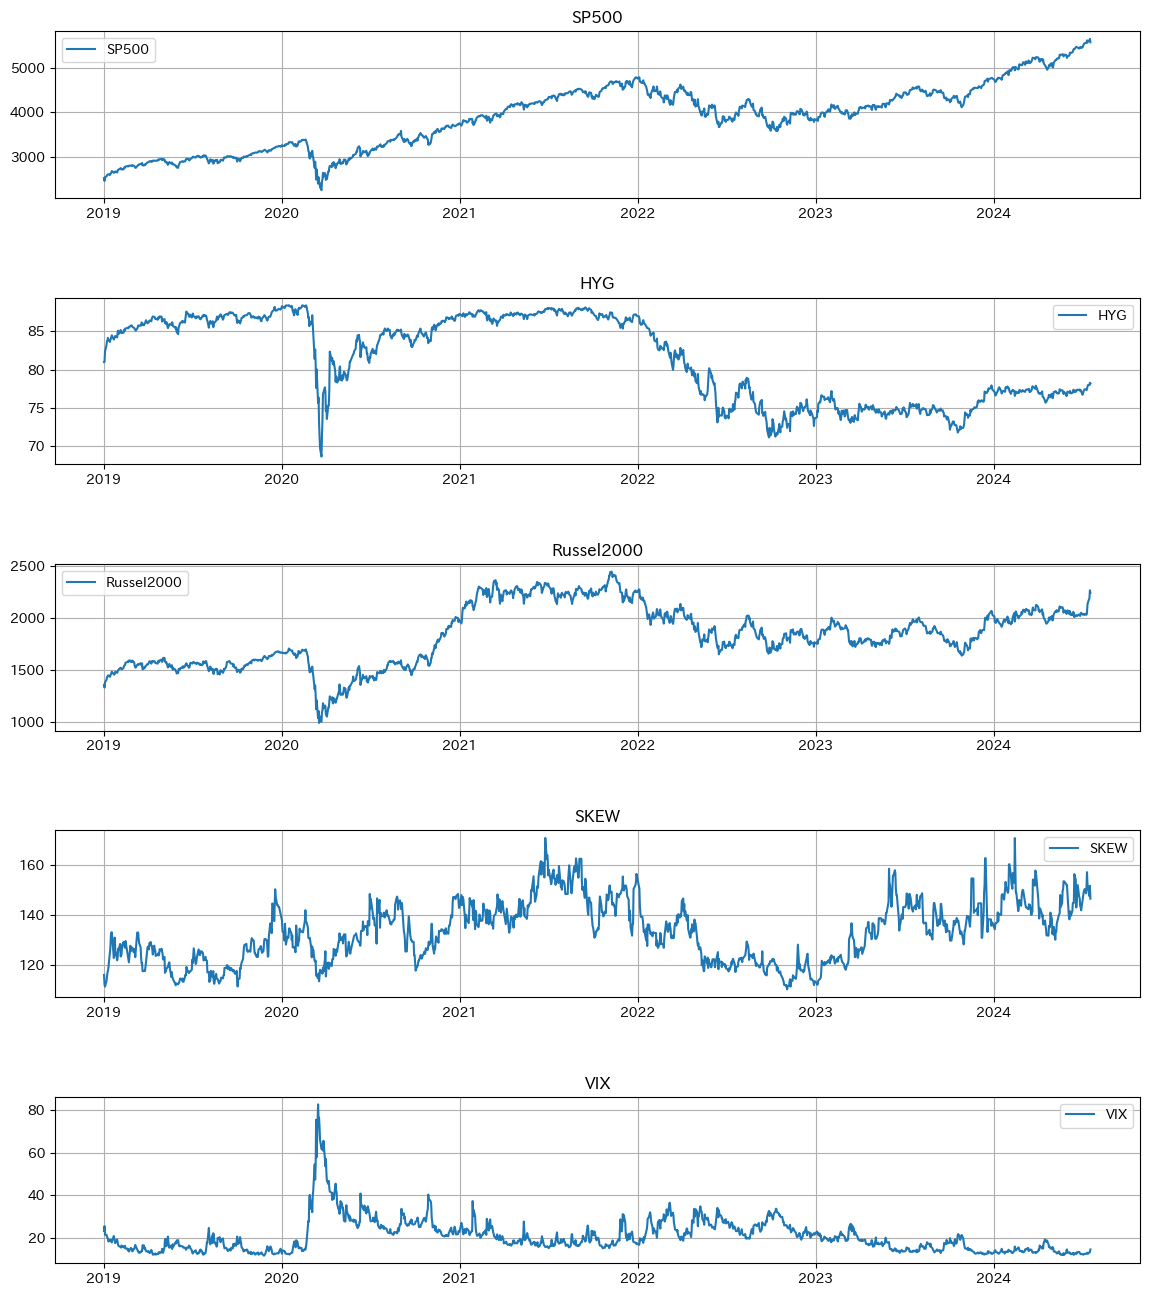

In [ ]:
plt.figure(figsize=(14,16))

# 余白を設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# グラフの描画
plt.subplot(5,1,1)
plt.plot(df['SP500'], label='SP500')
plt.title('SP500')
plt.legend()
plt.grid(True)

plt.subplot(5,1,2)
plt.plot(df['HYG'], label='HYG')
plt.title('HYG')
plt.legend()
plt.grid(True)

plt.subplot(5,1,3)
plt.plot(df['Russel2000'], label='Russel2000')
plt.title('Russel2000')
plt.legend()
plt.grid(True)

plt.subplot(5,1,4)
plt.plot(df['SKEW'], label='SKEW')
plt.title('SKEW')
plt.legend()
plt.grid(True)

plt.subplot(5,1,5)
plt.plot(df['VIX'], label='VIX')
plt.title('VIX')
plt.legend()
plt.grid(True)

plt.show()

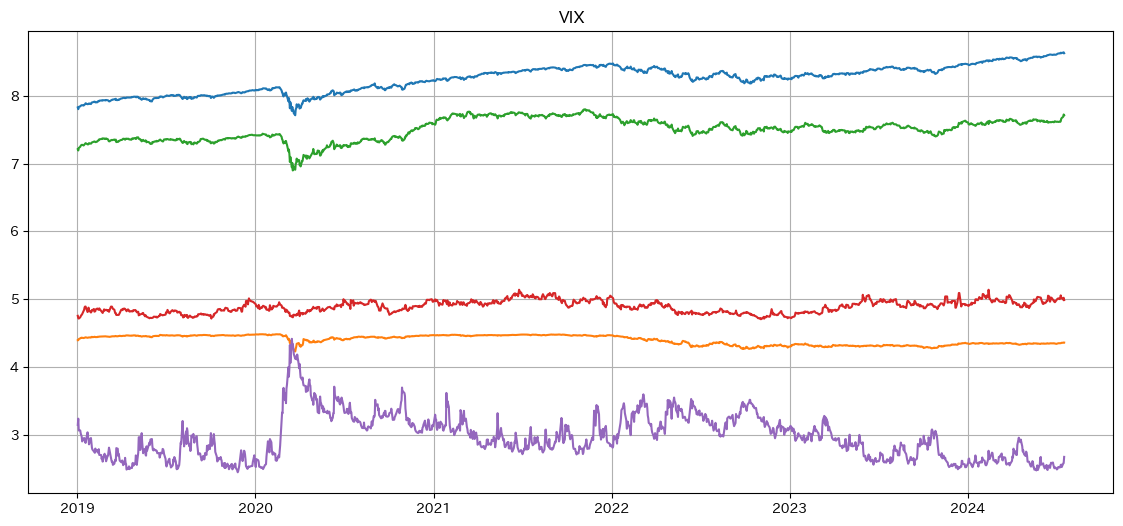

In [ ]:
plt.figure(figsize=(14,6))

# 余白を設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# グラフの描画
plt.subplot(1,1,1)

plt.plot(np.log(df['SP500']), label='SP500')
plt.title('SP500')

plt.plot(np.log(df['HYG']), label='HYG')
plt.title('HYG')

plt.plot(np.log(df['Russel2000']), label='Russel2000')
plt.title('Russel2000')

plt.plot(np.log(df['SKEW']), label='SKEW')
plt.title('SKEW')

plt.plot(np.log(df['VIX']), label='VIX')
plt.title('VIX')

plt.grid(True)
plt.show()

### データの平滑化  
データを平滑化するために、短期14日での単純移動平均（SMA：Simple Moving Average）をとります。

In [ ]:
# 14日の移動平均をとる
df['SP500_SMA14'] = df['SP500'].rolling(window=14).mean()
df['HYG_SMA14'] = df['HYG'].rolling(window=14).mean()
df['Russel2000_SMA14'] = df['Russel2000'].rolling(window=14).mean()
df['SKEW_SMA14'] = df['SKEW'].rolling(window=14).mean()
df['VIX_SMA14'] = df['VIX'].rolling(window=14).mean()

df[-4:]

,SP500,HYG,Russel2000,SKEW,VIX,SP500_SMA14,HYG_SMA14,Russel2000_SMA14,SKEW_SMA14,VIX_SMA14
Date,,,,,,,,,,
2024-07-12,5615.35,77.980003,2148.270020,150.860001,12.46,5529.311429,77.335715,2048.414280,148.127858,12.523571
2024-07-15,5631.22,77.989998,2187.020020,147.399994,13.12,5542.407857,77.384286,2059.572135,148.147143,12.508571
2024-07-16,5667.20,78.290001,2263.669922,151.529999,13.19,5556.543571,77.447143,2076.809274,148.496428,12.533571
2024-07-17,5588.27,78.199997,2239.669922,146.389999,14.48,5564.427143,77.515714,2092.634269,148.703571,12.671428


In [ ]:
df.dropna(how= 'any', inplace= True)
display(df)
display(df.isnull().sum())

,SP500,HYG,Russel2000,SKEW,VIX,SP500_SMA14,HYG_SMA14,Russel2000_SMA14,SKEW_SMA14,VIX_SMA14
Date,,,,,,,,,,
2019-01-22,2632.90,83.940002,1457.449951,122.820000,20.799999,2581.457143,83.390001,1426.497149,121.070715,20.211428
2019-01-23,2638.70,84.110001,1454.260010,123.879997,19.520000,2590.647857,83.612858,1433.522147,121.629287,19.947143
2019-01-24,2642.33,84.199997,1464.410034,130.919998,18.889999,2604.536429,83.839287,1443.063581,122.965001,19.478571
2019-01-25,2664.76,84.410004,1482.849976,126.110001,17.420000,2614.023571,83.983573,1450.356437,124.012858,19.195714
2019-01-28,2643.85,84.279999,1473.540039,123.059998,18.870001,2620.749286,84.061430,1455.225725,124.691429,19.015000
...,...,...,...,...,...,...,...,...,...,...
2024-07-11,5584.54,77.779999,2125.040039,152.229996,12.920000,5518.545000,77.293571,2039.397138,148.194286,12.576429
2024-07-12,5615.35,77.980003,2148.270020,150.860001,12.460000,5529.311429,77.335715,2048.414280,148.127858,12.523571
2024-07-15,5631.22,77.989998,2187.020020,147.399994,13.120000,5542.407857,77.384286,2059.572135,148.147143,12.508571


SP500               0
HYG                 0
Russel2000          0
SKEW                0
VIX                 0
SP500_SMA14         0
HYG_SMA14           0
Russel2000_SMA14    0
SKEW_SMA14          0
VIX_SMA14           0
dtype: int64

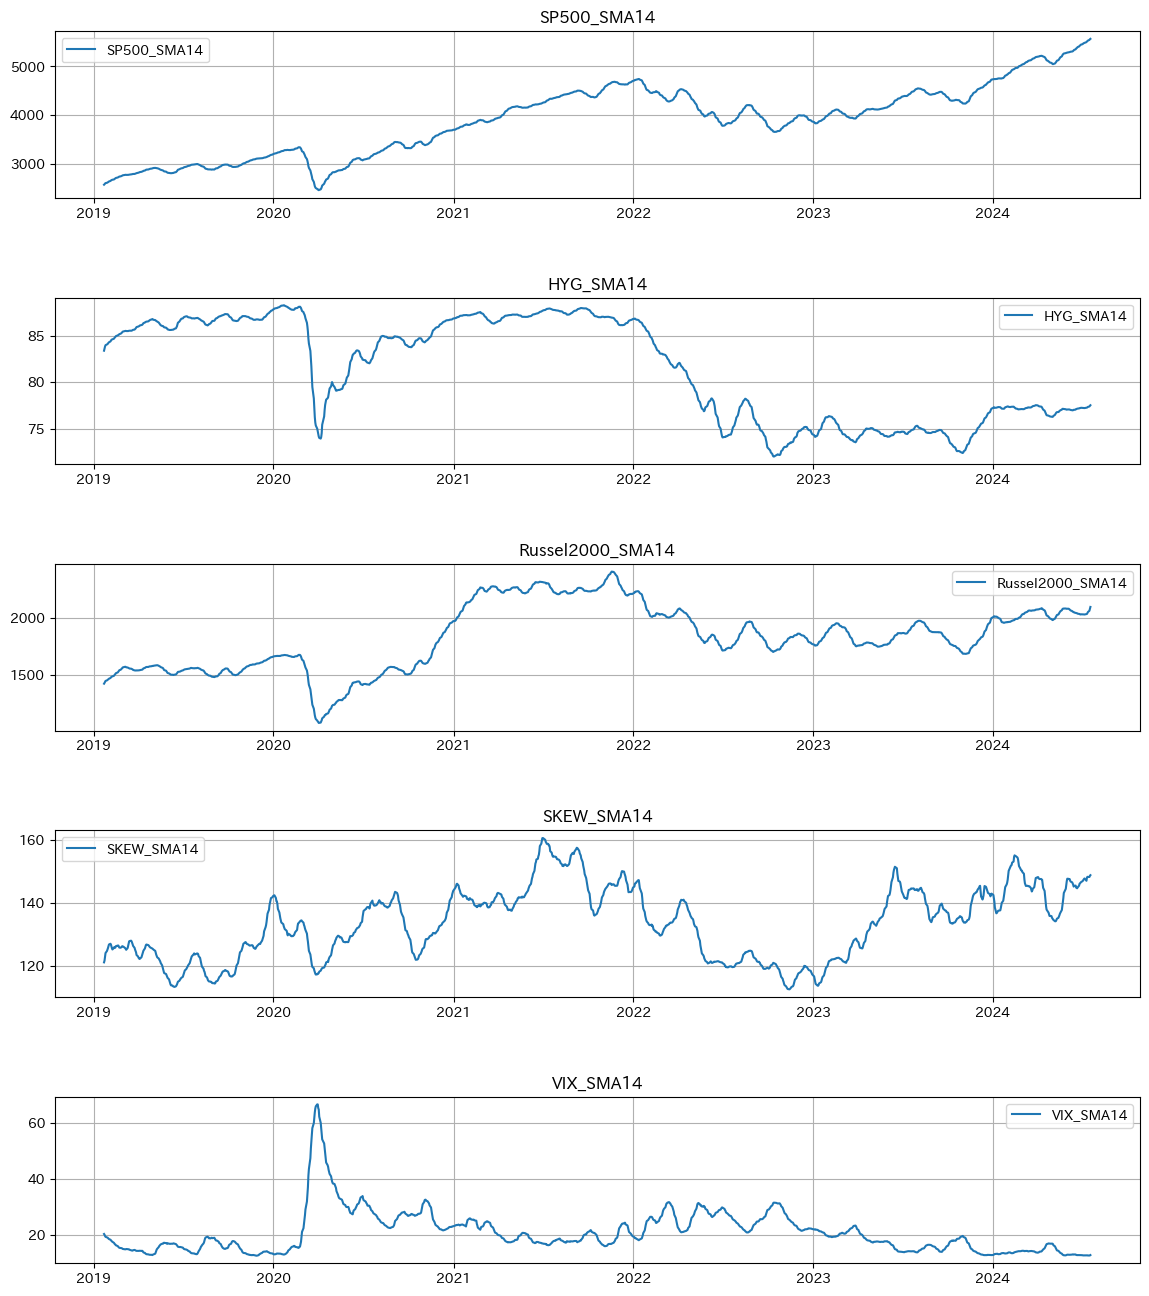

In [ ]:
plt.figure(figsize=(14,16))

# 余白を設定
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# グラフの描画
plt.subplot(5,1,1)
plt.plot(df['SP500_SMA14'], label='SP500_SMA14')
plt.title('SP500_SMA14')
plt.legend()
plt.grid(True)

plt.subplot(5,1,2)
plt.plot(df['HYG_SMA14'], label='HYG_SMA14')
plt.title('HYG_SMA14')
plt.legend()
plt.grid(True)

plt.subplot(5,1,3)
plt.plot(df['Russel2000_SMA14'], label='Russel2000_SMA14')
plt.title('Russel2000_SMA14')
plt.legend()
plt.grid(True)

plt.subplot(5,1,4)
plt.plot(df['SKEW_SMA14'], label='SKEW_SMA14')
plt.title('SKEW_SMA14')
plt.legend()
plt.grid(True)

plt.subplot(5,1,5)
plt.plot(df['VIX_SMA14'], label='VIX_SMA14')
plt.title('VIX_SMA14')
plt.legend()
plt.grid(True)

plt.show()

# S&P500とHYGの時系列のグラフ作成  
S&P500とHYGのグラフを重ねて表示することで、両者の関係を大雑把に確認してみます。ここでは、plotly を使って可視化

In [ ]:
import plotly.graph_objects as go # グラフ表示関連ライブラリ
import plotly.io as pio # 入出力関連ライブラリ
# pio.renderers.default = 'iframe'
from plotly import offline

from plotly.subplots import make_subplots  # subplot

In [ ]:
# グラフの実体trace オブジェクトを生成
sp500_trace = go.Scatter(
    x=df.index,
    y=df['SP500_SMA14'],
    mode='lines',
    line=dict(color='blue', width=5),
    name='SP500_SMA14'
)


# グラフの実体trace オブジェクトを生成
hyg_trace = go.Scatter(
    x=df.index,
    y=df['HYG_SMA14'],
    mode='lines',
    line=dict(color='red', width=5),
    name='HYG_SMA14'
)

# 2つ目の軸を表示する設定
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 描画領域である figure オブジェクトの作成
fig.add_trace(sp500_trace, secondary_y=False)  # 第1軸に設定(secondary_y=False)
fig.add_trace(hyg_trace, secondary_y=True)  # 第2軸に設定(secondary_y=True)

# レイアウトの更新
fig.update_layout(

    # 凡例
    showlegend=True,

    # 幅と高さの設定
    width=900,height=600,

    # タイトルの設定
    title=dict(
        text='SP500とHYGの関係', # タイトル
        font=dict(family='Times New Roman', size=20, color='grey'), # フォントの指定
        xref='paper', # container or paper
        x=0.45,
        y=0.9,
        xanchor='center',
    ),

    plot_bgcolor='white', # 背景色を白に設定

    # 凡例の設定
    legend=dict(
        xanchor='right',
        yanchor='bottom',
        x=0.5,
        y=0.85,
        orientation='v',
        bgcolor='white',
        bordercolor='grey',
        borderwidth=1,
    ),
),

# 軸の設定
fig.update_yaxes(title='SP500', secondary_y=False)
fig.update_yaxes(title='HYG', secondary_y=True)

# linecolorを設定して、ラインをミラーリング（mirror=True）して枠にする
fig.update_xaxes(linecolor='black', linewidth=1, mirror=True)
fig.update_yaxes(linecolor='black', linewidth=1, mirror=True)

fig.update_xaxes(linecolor='black', linewidth=1, mirror=True)
fig.update_yaxes(linecolor='black', linewidth=1, mirror=True)

# ticks='inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)
fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)

fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)
fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)

# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash='dot'：破線
fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')
fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')

fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')
fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')

# tick0：初期軸目盛り, dtick：軸目盛り間隔
fig.update_xaxes(dtick='M12')  # 12カ月ごと

# 軸の文字サイズ変更
fig.update_xaxes(tickfont=dict(size=14, color='grey'))
fig.update_yaxes(tickfont=dict(size=18, color='grey'))

# show()メソッドでグラフを描画
# fig.show()

# ファイルサイズを小さくしたい場合にはTrueを選べば良い
offline.plot(fig, filename = 'basic-line', auto_open = True)

/home/bayes/.local/lib/python3.10/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'basic-line.html'

S&P500とHYGの間には、相関がありそうです。  
2021年の後半でのHYGの下落が、S&P500に先行しているようにも見えます。  
そこで、これらのデータの詳細な相関分析をおこなっていきます。

### S&P500とHYGの詳細な相関分析

#### 前処理  
S&P500とHYGのみのデータフレーム df_SP500_HYG を作成して、更にHYGを-60から60日ずらしたデータを作成して、df_SP500_HYG に結合

In [ ]:
# # SP500とHYGのみのデータフレームを作成
df_SP500_HYG = df[['SP500', 'HYG_SMA14']]
display(df_SP500_HYG[:3])

# List of days to shift from -60 to 60
shift_days = list(range(-60, 61))

for days in shift_days:
    # Determine the suffix for column names
    suffix = 'B' if days < 0 else 'A'  if days > 0 else 'Current'

    # Create a shifted dataframe
    shifted_df = df_SP500_HYG[["HYG_SMA14"]].shift(freq= f'{days}D')

    # Rename the column
    shifted_df.columns = [f'HYG_{abs(days)}D_{suffix}']

    # Merge with the main dataframe
    df_SP500_HYG = pd.merge(df_SP500_HYG, shifted_df, on='Date', how='left')

display(df_SP500_HYG.head(3))


,SP500,HYG_SMA14
Date,,
2019-01-22,2632.90,83.390001
2019-01-23,2638.70,83.612858
2019-01-24,2642.33,83.839287


,SP500,HYG_SMA14,HYG_60D_B,HYG_59D_B,HYG_58D_B,HYG_57D_B,HYG_56D_B,HYG_55D_B,HYG_54D_B,HYG_53D_B,...,HYG_51D_A,HYG_52D_A,HYG_53D_A,HYG_54D_A,HYG_55D_A,HYG_56D_A,HYG_57D_A,HYG_58D_A,HYG_59D_A,HYG_60D_A
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,2632.90,83.390001,NaN,85.638571,85.612857,85.574286,85.544286,85.544286,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-23,2638.70,83.612858,NaN,NaN,85.638571,85.612857,85.574286,85.544286,85.544286,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-24,2642.33,83.839287,85.664999,NaN,NaN,85.638571,85.612857,85.574286,85.544286,85.544286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_SP500_HYG.ffill(inplace=True)  # NaNをNanの前の値で補完する
display(df_SP500_HYG.isnull().sum())  # NaNがないか確認する

SP500         0
HYG_SMA14     0
HYG_60D_B     2
HYG_59D_B     0
HYG_58D_B     0
             ..
HYG_56D_A    39
HYG_57D_A    40
HYG_58D_A    41
HYG_59D_A    42
HYG_60D_A    43
Length: 123, dtype: int64

In [ ]:
df_SP500_HYG.dropna(how='any', inplace=True)  # NaNを消去
display(df_SP500_HYG.isnull().sum())  # NaNがないか確認する
display(df_SP500_HYG.head(3))

SP500        0
HYG_SMA14    0
HYG_60D_B    0
HYG_59D_B    0
HYG_58D_B    0
            ..
HYG_56D_A    0
HYG_57D_A    0
HYG_58D_A    0
HYG_59D_A    0
HYG_60D_A    0
Length: 123, dtype: int64

,SP500,HYG_SMA14,HYG_60D_B,HYG_59D_B,HYG_58D_B,HYG_57D_B,HYG_56D_B,HYG_55D_B,HYG_54D_B,HYG_53D_B,...,HYG_51D_A,HYG_52D_A,HYG_53D_A,HYG_54D_A,HYG_55D_A,HYG_56D_A,HYG_57D_A,HYG_58D_A,HYG_59D_A,HYG_60D_A
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-25,2798.36,85.664999,85.909285,85.977857,86.035000,86.045714,86.057143,86.205000,86.276429,86.134286,...,84.173573,84.297858,84.241429,84.173573,84.097144,84.061430,83.839287,83.612858,83.983573,83.839287
2019-03-26,2818.46,85.716427,85.909285,85.909285,85.977857,86.035000,86.045714,86.057143,86.276429,86.134286,...,84.173573,84.297858,84.297858,84.241429,84.173573,84.097144,84.061430,83.612858,83.983573,83.983573
2019-03-27,2805.37,85.776428,85.909285,85.909285,85.909285,85.977857,86.035000,86.045714,86.057143,86.134286,...,84.387858,84.297858,84.297858,84.297858,84.241429,84.173573,84.097144,84.061430,83.983573,83.983573


### SP500とHYGを-60から60日ずらしたデータとの相関係数を算出して描画  
S&P500とHYGを -60から60日ずらしたデータとの相関係数を算出

In [ ]:
df_SP500_HYG.corr().head(3) # 相関関係

,SP500,HYG_SMA14,HYG_60D_B,HYG_59D_B,HYG_58D_B,HYG_57D_B,HYG_56D_B,HYG_55D_B,HYG_54D_B,HYG_53D_B,...,HYG_51D_A,HYG_52D_A,HYG_53D_A,HYG_54D_A,HYG_55D_A,HYG_56D_A,HYG_57D_A,HYG_58D_A,HYG_59D_A,HYG_60D_A
SP500,1.000000,-0.360595,-0.424378,-0.424320,-0.422301,-0.421298,-0.420098,-0.418406,-0.416610,-0.416955,...,-0.405420,-0.405149,-0.405816,-0.406144,-0.406400,-0.406605,-0.406953,-0.407321,-0.407679,-0.407693
HYG_SMA14,-0.360595,1.000000,0.883057,0.885402,0.886780,0.888441,0.890705,0.894156,0.897892,0.896155,...,0.896860,0.896160,0.895569,0.894026,0.892585,0.890470,0.887275,0.883218,0.882602,0.881842
HYG_60D_B,-0.424378,0.883057,1.000000,0.999406,0.999207,0.999068,0.998489,0.996784,0.993873,0.994115,...,0.811788,0.811425,0.811167,0.809998,0.808839,0.806964,0.804281,0.800946,0.800856,0.800248


S&P500との関係を抽出するため、SP500列のみを新たなデータフレーム df_SP500_HYG_corr とします。

In [ ]:
df_SP500_HYG_corr = df_SP500_HYG.corr()[['SP500']]     # 相関係数の SP500の列のみをデータフレームにする
df_SP500_HYG_corr.drop(index='SP500', inplace=True)     # indexの SP500の行を削除
display(df_SP500_HYG_corr.head(3))

df_SP500_HYG_corr.reset_index(inplace=True)     # indexをリセットする
display(df_SP500_HYG_corr.head(3))

df_SP500_HYG_corr.columns = ['スライド日数_元', '相関係数']
df_SP500_HYG_corr.drop(index=0, inplace=True)     # HYG_SMA14の行を削除する
display(df_SP500_HYG_corr)

,SP500
HYG_SMA14,-0.360595
HYG_60D_B,-0.424378
HYG_59D_B,-0.424320


,index,SP500
0,HYG_SMA14,-0.360595
1,HYG_60D_B,-0.424378
2,HYG_59D_B,-0.424320


,スライド日数_元,相関係数
1,HYG_60D_B,-0.424378
2,HYG_59D_B,-0.424320
3,HYG_58D_B,-0.422301
4,HYG_57D_B,-0.421298
5,HYG_56D_B,-0.420098
...,...,...
117,HYG_56D_A,-0.406605
118,HYG_57D_A,-0.406953
119,HYG_58D_A,-0.407321
120,HYG_59D_A,-0.407679


-60から60日ずらした日数と相関係数の関係を可視化するために、ずらした日数、  
すなわちスライド日数列を新たに作成します。

In [ ]:
df_SP500_HYG_corr['スライド日数'] = 0

# List of days to shift from -60 to 60
shift_days = list(range(-60, 61))

for days in shift_days:
    # Determine the suffix for column names
    suffix = 'B' if days < 0 else 'A' if days > 0 else 'Current'

    # column name
    shifted_colum_name = f'HYG_{abs(days)}D_{suffix}'
    df_SP500_HYG_corr.loc[df_SP500_HYG_corr['スライド日数_元'] == shifted_colum_name, 'スライド日数'] = days

display(df_SP500_HYG_corr)

,スライド日数_元,相関係数,スライド日数
1,HYG_60D_B,-0.424378,-60
2,HYG_59D_B,-0.424320,-59
3,HYG_58D_B,-0.422301,-58
4,HYG_57D_B,-0.421298,-57
5,HYG_56D_B,-0.420098,-56
...,...,...,...
117,HYG_56D_A,-0.406605,56
118,HYG_57D_A,-0.406953,57
119,HYG_58D_A,-0.407321,58
120,HYG_59D_A,-0.407679,59


In [ ]:
# グラフの実体trace オブジェクトを生成
bar_trace_1 = go.Bar(x = df_SP500_HYG_corr['スライド日数'], y = df_SP500_HYG_corr['相関係数'], name = '相関係数')

# レイアウトオブジェクトを生成
graph_layout = go.Layout(

    # 幅と高さの設定
    width=800, height=600,

    # タイトルの設定
    title=dict(
        text='スライド日数と相関係数の関係', # タイトル
        font=dict(family='Times New Roman', size=20, color='grey'), # フォントの指定
        xref='paper', # container or paper
        x=0.5,
        y=0.87,
        xanchor='center',
    ),

    # 軸の設定
    xaxis = dict(title = 'スライド日数', showgrid=False),
    yaxis = dict(title = '相関係数', side = 'left', showgrid=False),
#     yaxis2 = dict(title = '相関係数', side = 'right',showgrid=False, overlaying = 'y'),

    # 凡例の設定
    legend=dict(
        xanchor='left',
        yanchor='bottom',
        x=0.5,
        y=0.85,
        orientation='h',
        bgcolor='white',
        bordercolor='grey',
        borderwidth=1,
    ),
)

# 描画領域である figure オブジェクトの作成
fig = go.Figure(layout=graph_layout)

# add_trace()メソッドでグラフの実体を追加
fig.add_trace(bar_trace_1)
# fig.add_trace(scatter_trace_1)

# レイアウトの更新
fig.update_layout(
    plot_bgcolor='white', # 背景色を白に設定
)

# 軸の設定
# linecolorを設定して、ラインをミラーリング（mirror=True）して枠にする
fig.update_xaxes(linecolor='black', linewidth=1, mirror=True)
fig.update_yaxes(linecolor='black', linewidth=1, mirror=True)

# ticks='inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)
fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)

# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash='dot'：破線
fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')
fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')

# 軸の文字サイズ変更
fig.update_xaxes(tickfont=dict(size=15, color='grey'))
fig.update_yaxes(tickfont=dict(size=15, color='grey'))

# show()メソッドでグラフを描画
# fig.show()

# ファイルサイズを小さくしたい場合にはTrueを選べば良い
offline.plot(fig, filename = 'basic-line', auto_open = True)

/home/bayes/.local/lib/python3.10/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `basic-line` didn't end with .html. Adding .html to the end of your file.



'basic-line.html'

今回はハイイールド債（HYG）に対して、日にちを前後にずらして相関係数を確認することで、前もってHYGを監視することで、S&P500の株価の上昇もしくは下降を予測できないか検討しましたが、  
スライド日数 0 近辺、すなわち一致して動いているときが一番S&P500の株価との相関が大きい結果となりました。今後は、他の指標についても同様の手法で、先行指数があるのかを確認していきたいと思います。
